In [1]:
import sys
sys.path.append("../src")


/local/home/aarslan/miniconda3/envs/score-face/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-07-22 09:48:18.632296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/local/home/aarslan/miniconda3/envs/score-face/lib/python3.9/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/local/home/aarslan/miniconda3/envs/score-face/lib/python3.9/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt
  0%|          | 0/70 [00:00<?, ?it/s]

update_round: 0, elev: 0.0, azimuth: -60.0


  1%|▏         | 1/70 [03:57<4:33:11, 237.55s/it]

update_round: 0, elev: 0.0, azimuth: 60.0


  1%|▏         | 1/70 [04:07<4:44:47, 247.64s/it]


KeyboardInterrupt: 

In [ ]:

    # for i in tqdm(list(range(sde.N))):
    #     t = timesteps[i]
    #     vec_t = torch.ones(cfg["batch_size"], device=cfg["device"]) * t
    #     alpha = torch.ones_like(vec_t)

# with torch.no_grad():
#     for i in tqdm(list(range(sde.N))):
#         t = timesteps[i]
#         vec_t = torch.ones(cfg["batch_size"], device=cfg["device"]) * t
#         alpha = torch.ones_like(vec_t)

#         background_mean, std = sde.marginal_prob(zeros, vec_t)
#         background = background_mean + torch.randn(size=image_shape, device=cfg["device"]) * std[:, None, None, None]

#         random_face = torch.randn(size=image_shape, device=cfg["device"]) * std[:, None, None, None]

#         filled_face = (initial_face + random_face) * (1 - 1 * unfilled_mask)

#         if i == 0:
#             unfilled_face = random_face * unfilled_mask
#             face = torch.where(unfilled_mask, unfilled_face, filled_face)
        

#         for j in range(cfg["num_corrector_steps"]):
#             grad_face = score_fn(face, vec_t)
#             grad_face_norm = torch.norm(grad_face.reshape(grad_face.shape[0], -1), dim=-1).mean()
#             noise_face = torch.randn_like(face)
#             noise_face_norm = torch.norm(noise_face.reshape(noise_face.shape[0], -1), dim=-1).mean()
#             step_size_face = (cfg["snr"] * noise_face_norm / grad_face_norm) ** 2 * 2 * alpha
#             grad_unfilled_face = grad_face * unfilled_mask
#             unfilled_face_mean = unfilled_face + step_size_face[:, None, None, None] * grad_unfilled_face
#             unfilled_face = unfilled_face_mean + torch.sqrt(step_size_face * 2)[:, None, None, None] * noise_face
#             face = torch.where(unfilled_mask, unfilled_face, filled_face)
        
#         masked_data_mean, std = sde.marginal_prob(data, vec_t)
#         masked_data = masked_data_mean + torch.randn_like(x) * std[:, None, None, None]
#         x = x * (1. - mask) + masked_data * mask
#         x_mean = x * (1. - mask) + masked_data_mean * mask
        
#         f, G = rsde.discretize(face, vec_t)
#         z = torch.randn_like(face)
#         unfilled_face_mean = unfilled_face - f
#         unfilled_face = unfilled_face_mean + G[:, None, None, None] * z
#         face = torch.where(unfilled_mask, unfilled_face, filled_face)

#         # if i == 0:
#             # save_images(cfg, _images=(1 * background_mask), image_type="background_mask", iteration=i)
#         if i % 10 == 0:
#             save_images(cfg=cfg, _images=torch.where(unfilled_mask, unfilled_face, filled_face), image_type="face", iteration=i)
#             # save_images(cfg=cfg, _images=texture, image_type="texture", iteration=i)
#             # save_images(cfg=cfg, _images=background, image_type="background", iteration=i)
#         # if i == sde.N - 1:
#             # save_gif(cfg=cfg)



In [4]:
import math

keypoints = []
keypoints_uv = []

for y in range(cfg["image_size"]):
    for x in range(cfg["image_size"]):
        u = math.floor( (pixel_uvs[0, y, x, 0] + 1) * cfg["texture_size"] / 2)
        v = cfg["texture_size"] - 1 - math.floor((cfg["texture_size"]) * (pixel_uvs[0, y, x, 1] + 1) / 2)
        # in_background = (u == 0 and v == cfg["texture_size"] - 1)
        # in_top_left_corner = u < cfg["texture_size"] * 500 / 2800 and v < cfg["texture_size"] * 500 / 2800
        # in_top_right_corner = v < cfg["texture_size"] * 500 / 2800 and u > cfg["texture_size"] * 2300 / 2800
        # if not in_background and not in_top_left_corner and not in_top_right_corner:
        if v in v_us_mapping.keys() and u in v_us_mapping[v]:
            keypoints.append((x, y))
            keypoints_uv.append((u, v))

keypoints_uv = np.array(keypoints_uv)
keypoints = np.array(keypoints)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


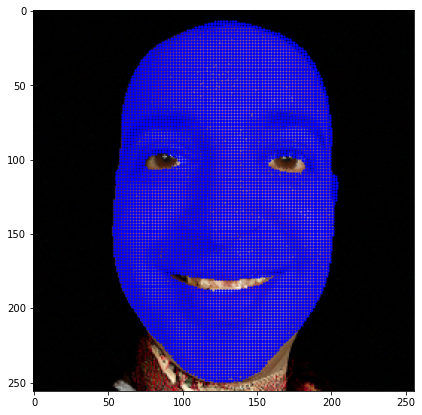

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


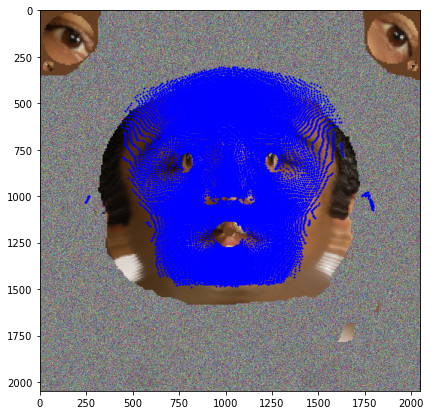

In [5]:
from skimage.transform import PiecewiseAffineTransform, warp
import matplotlib.pyplot as plt

def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img)
    return ax

face_np = face[0].permute(1, 2, 0).cpu().numpy()
ax = imshow(face_np)
ax.plot(keypoints[:, 0], keypoints[:, 1], '.b', markersize=2)
plt.show()


texture_np = texture[0].permute(1, 2, 0).cpu().numpy()
ax = imshow(texture_np)
ax.plot(keypoints_uv[:, 0], keypoints_uv[:, 1], '.b', markersize=2)
plt.show()

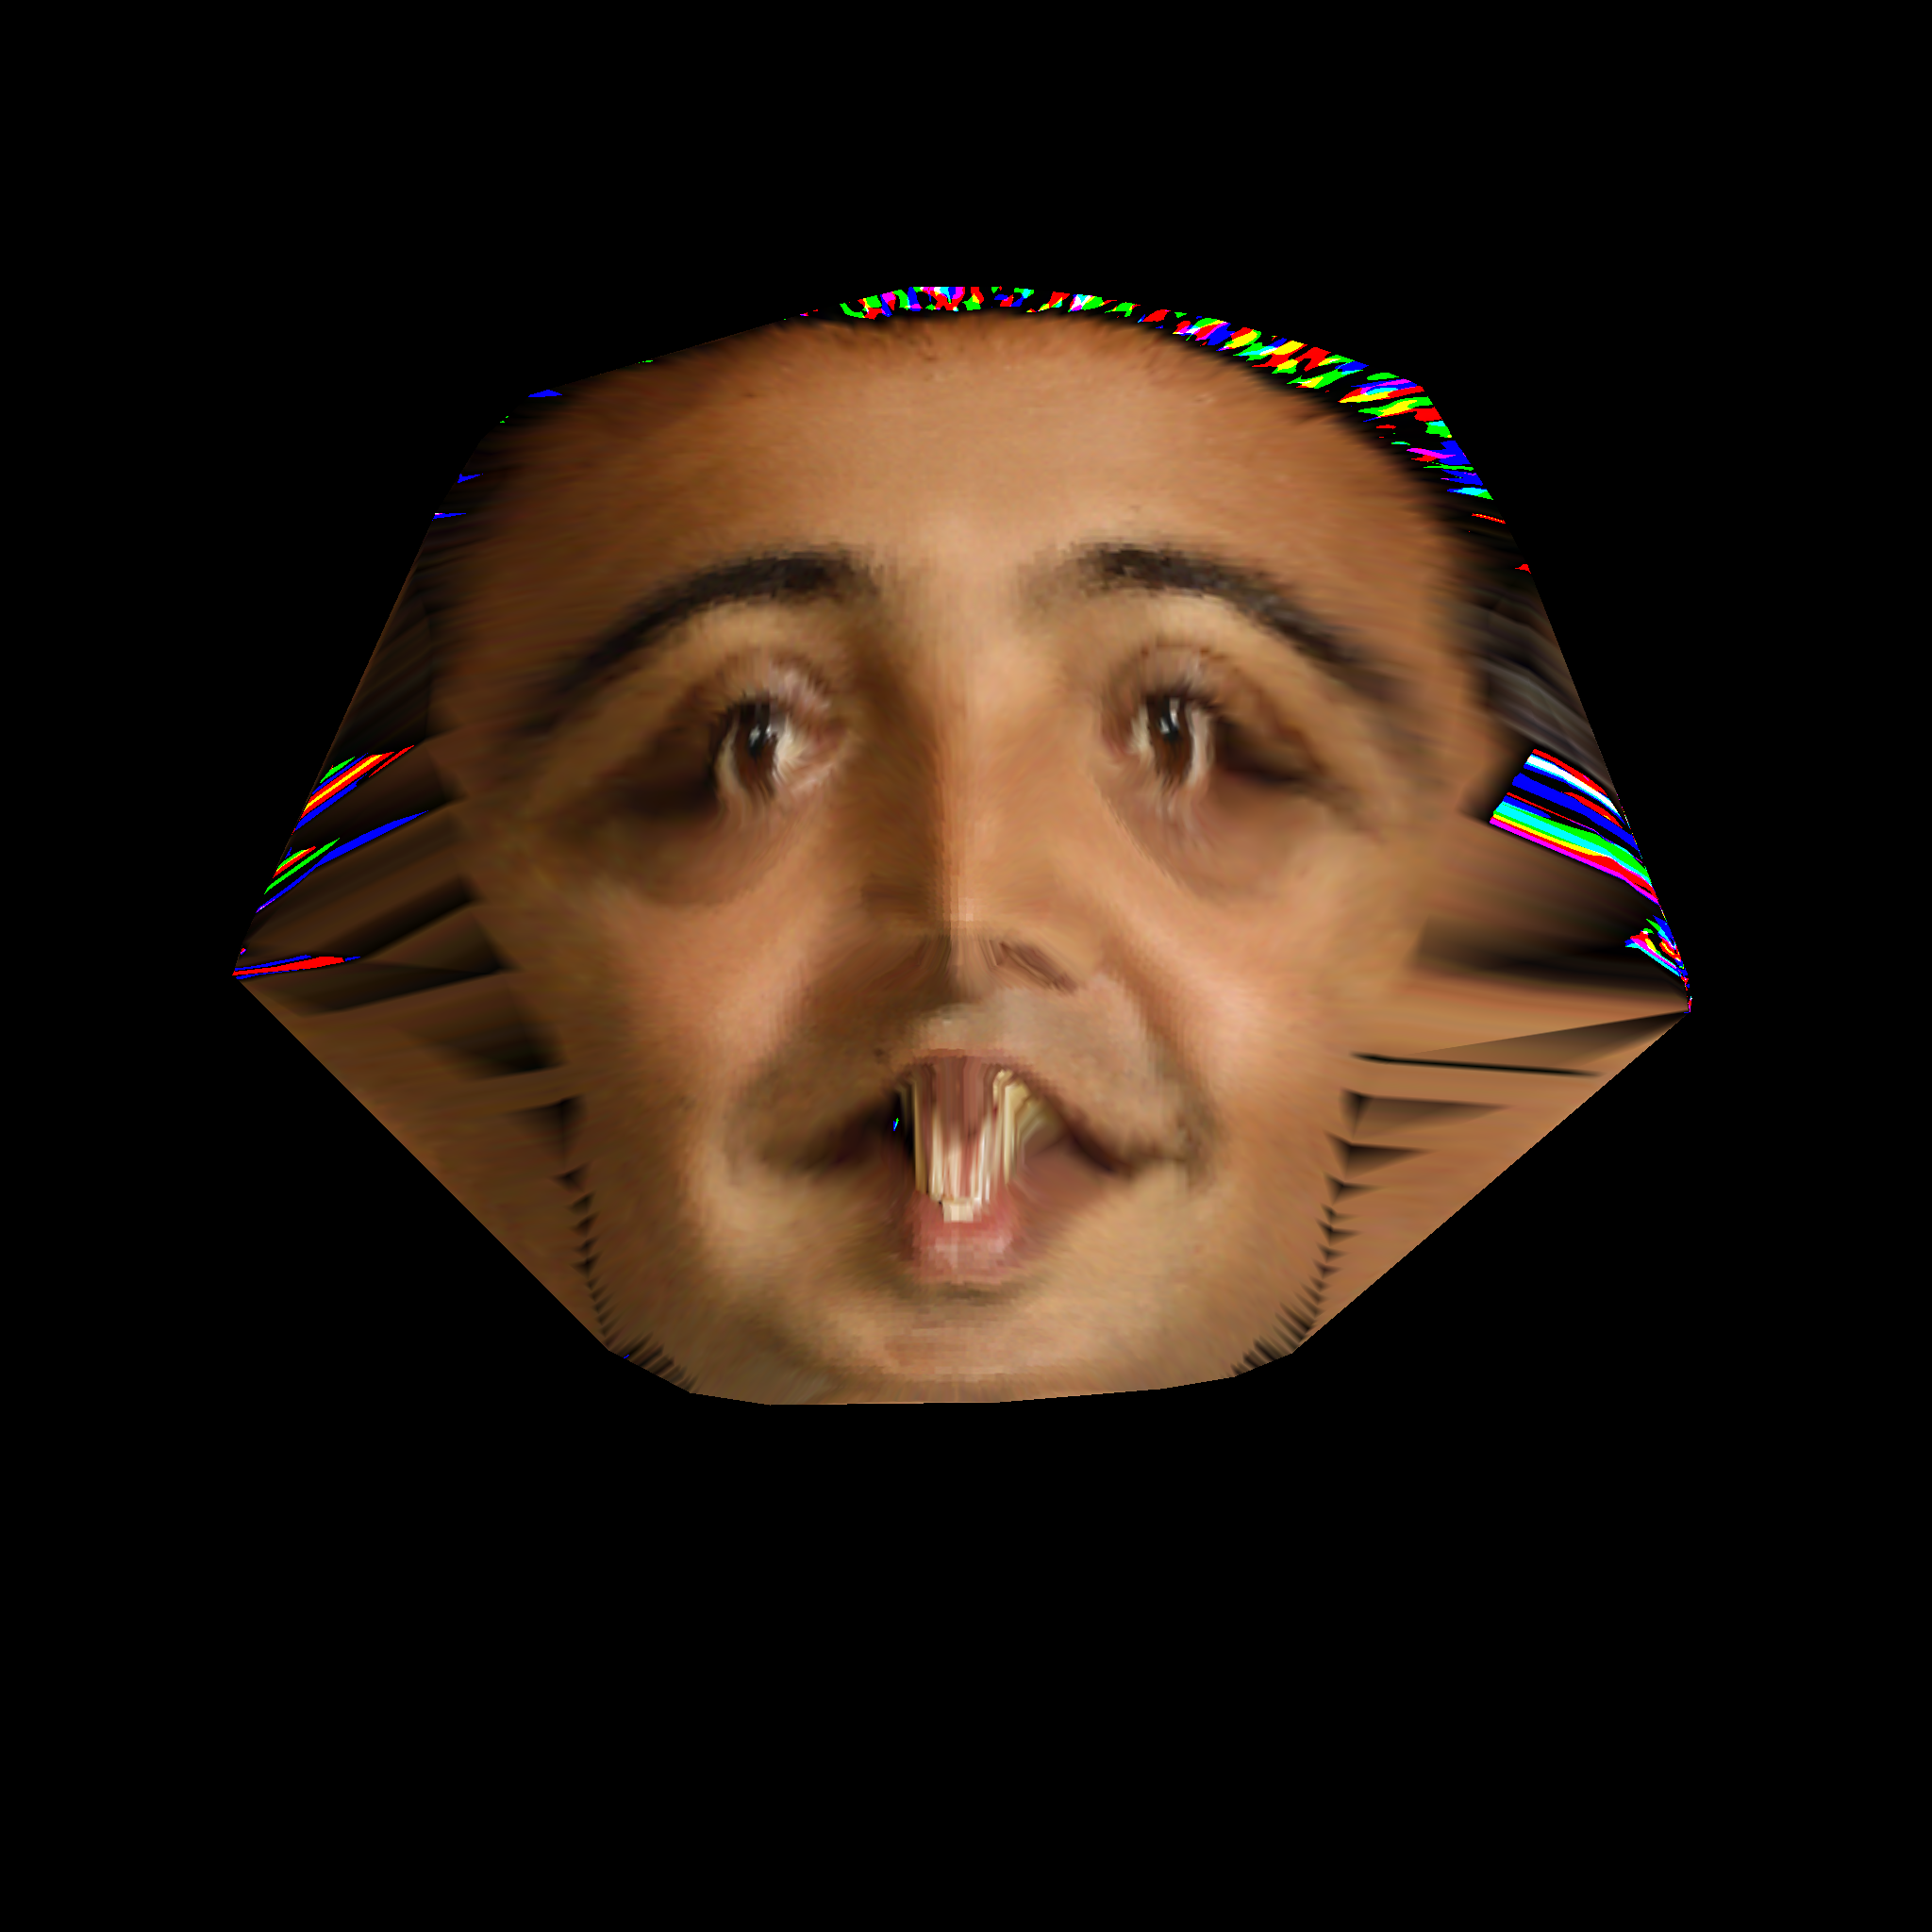

In [6]:
from PIL import Image

tform = PiecewiseAffineTransform()
tform.estimate(keypoints_uv, keypoints)
texture = warp(face_np, tform, output_shape=(cfg["texture_size"], cfg["texture_size"]))
texture = (255 * texture).astype(np.uint8)
Image.fromarray(texture)


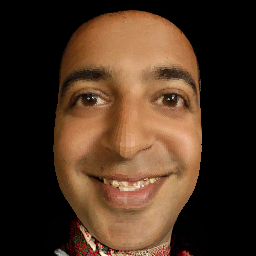

In [15]:
from PIL import Image
import math

new_face = np.zeros(shape=(cfg["image_size"], cfg["image_size"], cfg["num_channels"]))

for y in range(cfg["image_size"]):
    for x in range(cfg["image_size"]):
        u = math.floor( (pixel_uvs[0, y, x, 0] + 1) * cfg["texture_size"] / 2)
        v = cfg["texture_size"] - 1 - math.floor((cfg["texture_size"]) * (pixel_uvs[0, y, x, 1] + 1) / 2)
        in_background = (u == 0 and v == cfg["texture_size"] - 1)
        if in_background:
            current_pixel = np.array([0.0, 0.0, 0.0])
        else:
            current_pixel = np.clip(texture_np[v, u, :], 0.0, 1.0)
        new_face[y, x, :] = current_pixel

new_face = (np.array(new_face) * 255.0).astype(np.uint8)

display(Image.fromarray(new_face))


In [16]:
keypoints = []
keypoints_uv = []

for y in range(cfg["image_size"]):
    for x in range(cfg["image_size"]):
        u = math.floor( (pixel_uvs[0, y, x, 0] + 1) * cfg["texture_size"] / 2)
        v = cfg["texture_size"] - 1 - math.floor((cfg["texture_size"]) * (pixel_uvs[0, y, x, 1] + 1) / 2)
        in_background = (u == 0 and v == cfg["texture_size"] - 1)
        in_top_left_corner = u < cfg["texture_size"] * 500 / 2800 and v < cfg["texture_size"] * 500 / 2800
        in_top_right_corner = v < cfg["texture_size"] * 500 / 2800 and u > cfg["texture_size"] * 2300 / 2800
        if not in_background and not in_top_left_corner and not in_top_right_corner:
            keypoints.append((x, y))
            keypoints_uv.append((u, v))

keypoints_uv = np.array(keypoints_uv)
keypoints = np.array(keypoints)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


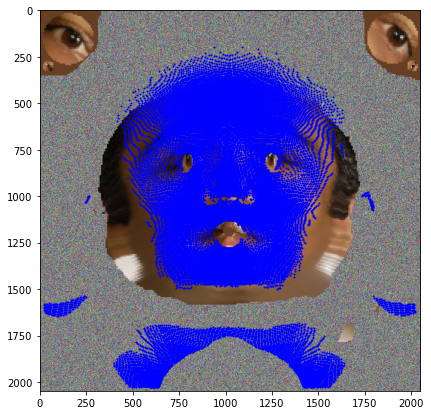

In [17]:
ax = imshow(texture_np)
ax.plot(keypoints_uv[:, 0], keypoints_uv[:, 1], '.b', markersize=2)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


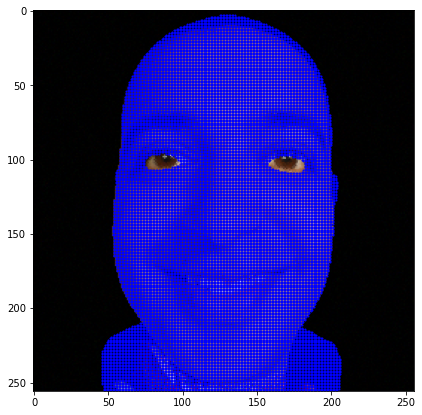

In [18]:
ax = imshow(face_np)
ax.plot(keypoints[:, 0], keypoints[:, 1], '.b', markersize=2)
plt.show()


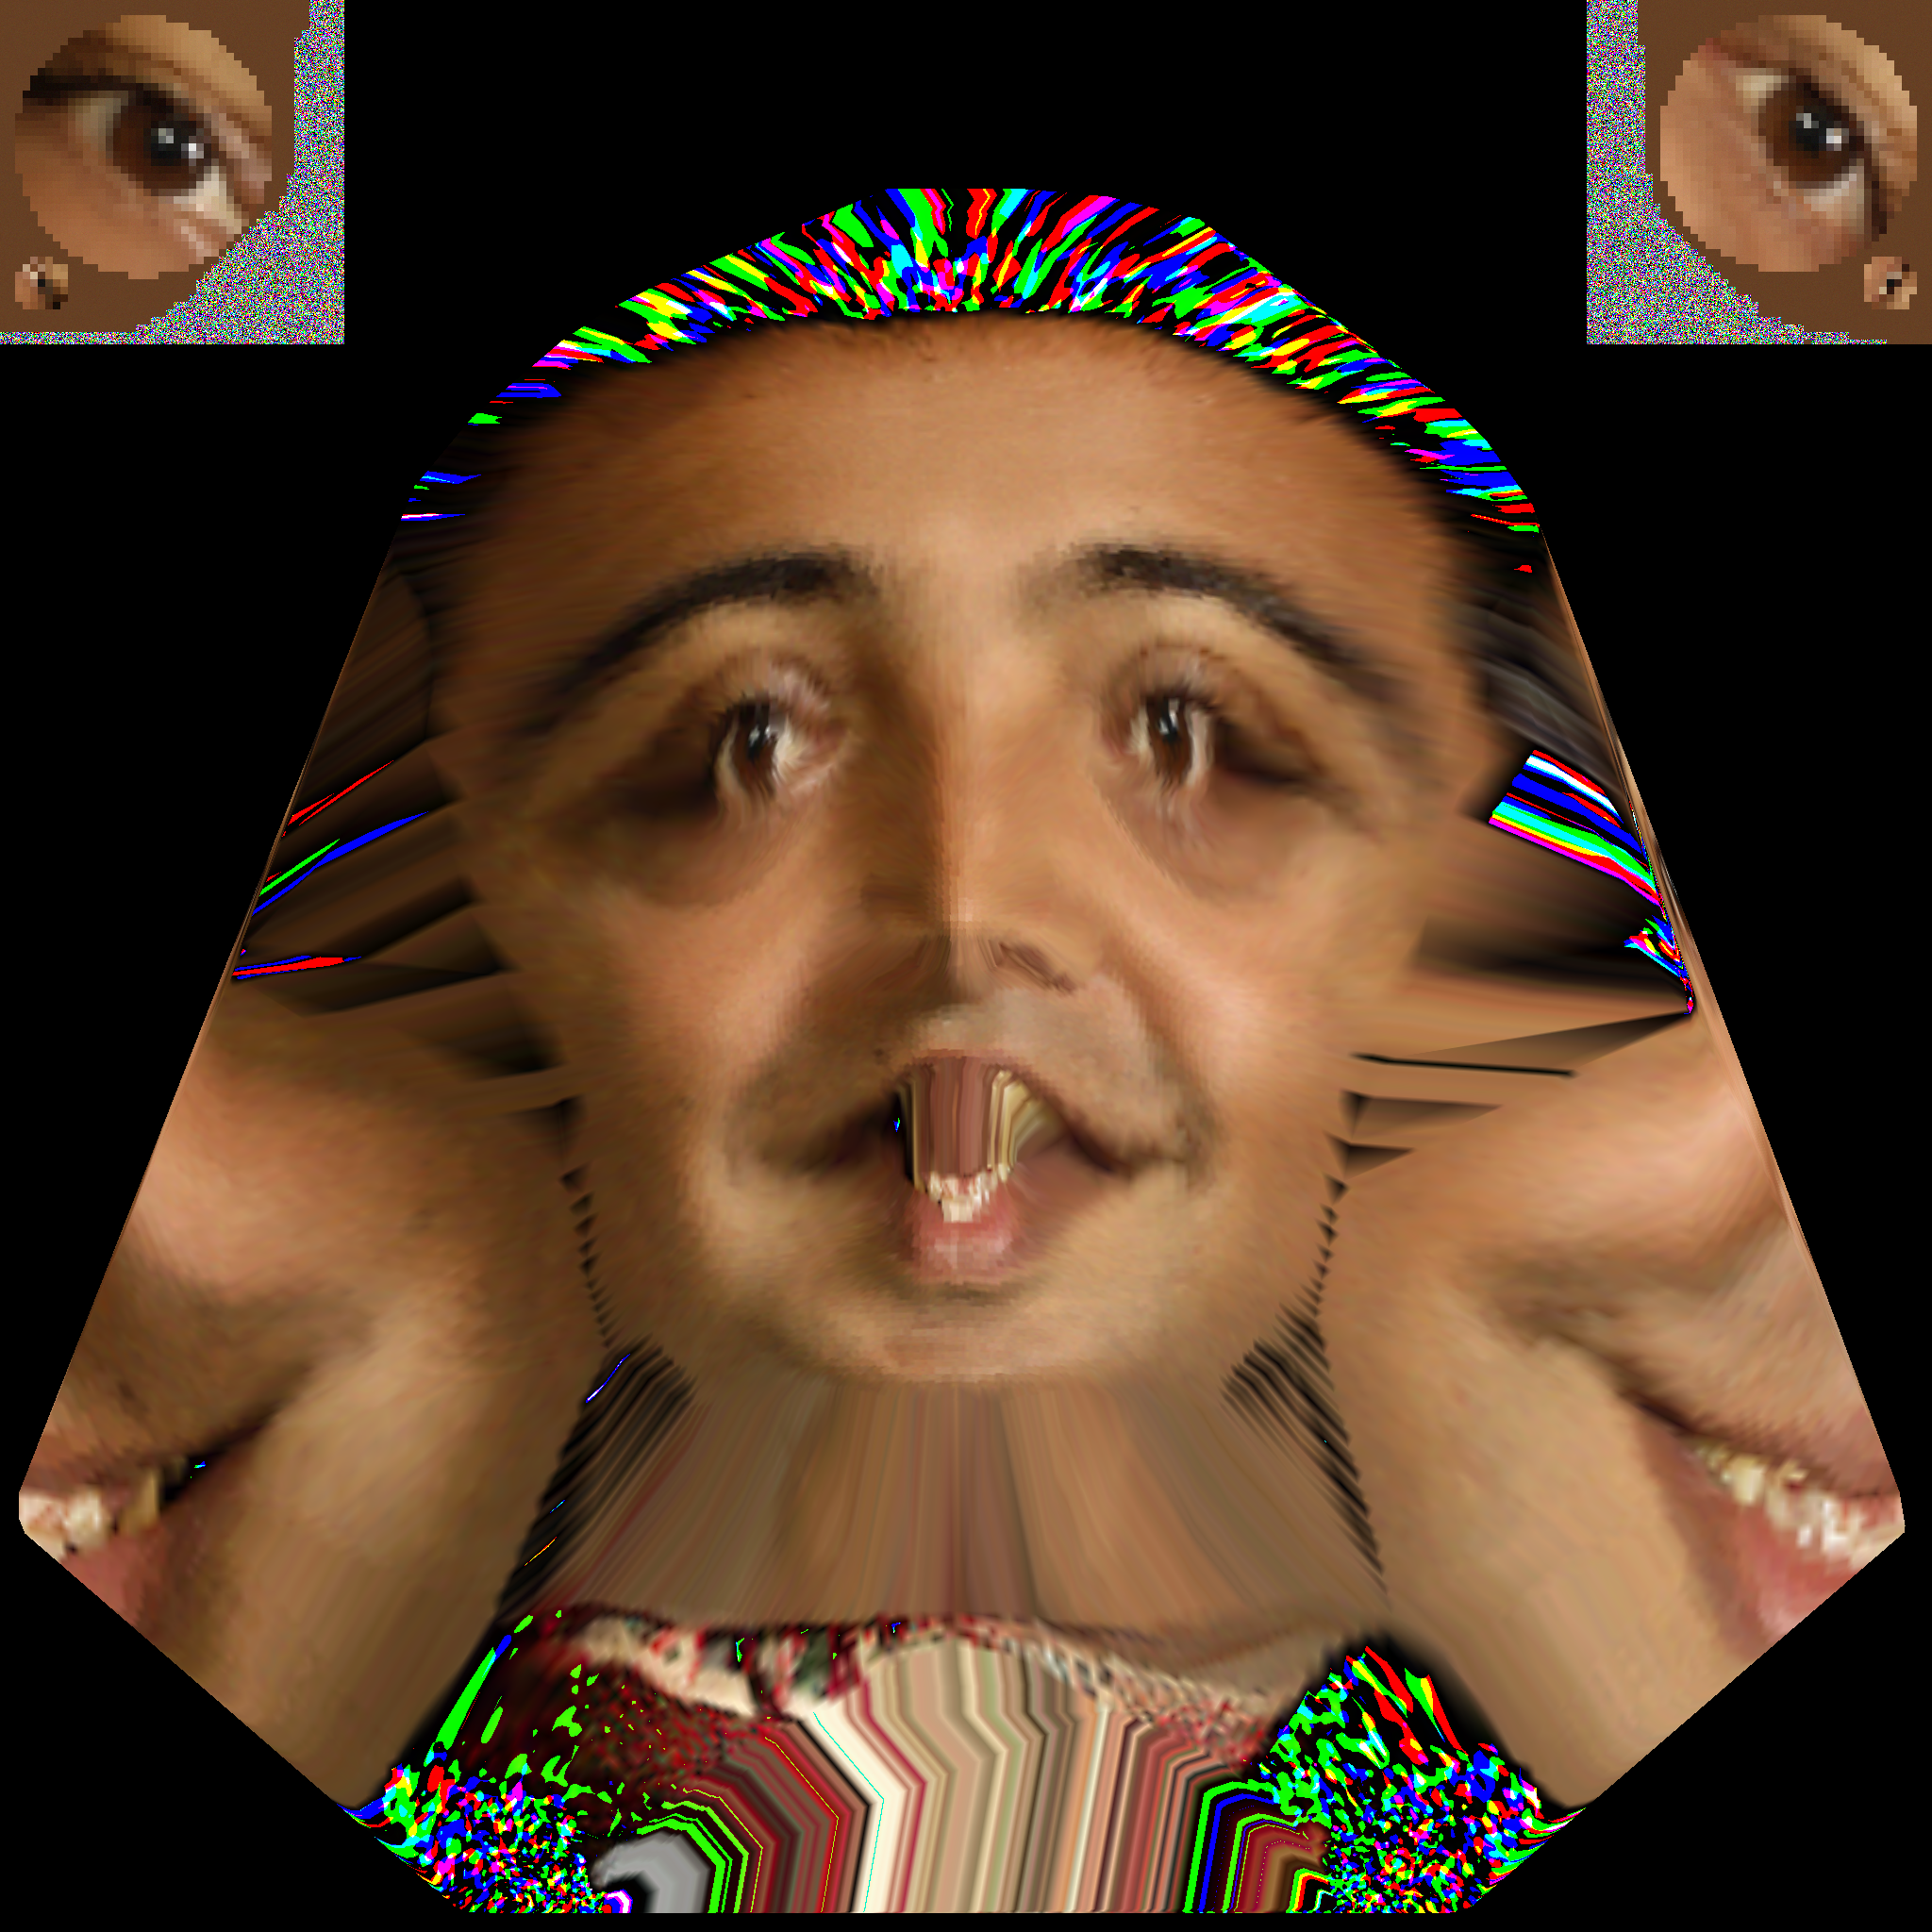

In [19]:
eye_region = np.zeros(shape=(cfg["texture_size"], cfg["texture_size"], cfg["num_channels"]))
eye_region[:int(500 * cfg["texture_size"] / 2800), :int(500 * cfg["texture_size"] / 2800), :] = 1
eye_region[:int(500 * cfg["texture_size"] / 2800), int(2300 * cfg["texture_size"] / 2800):, :] = 1

final_texture = np.where(eye_region, (np.clip(texture_np, 0, 1) * 255).astype(np.uint8), warped_texture)
Image.fromarray(final_texture)


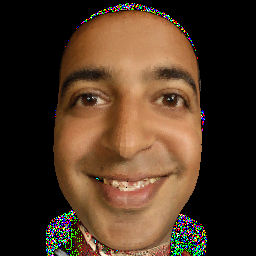

In [20]:
final_face = render(texture=torch.tensor(final_texture, device=cfg["device"], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0), background=background, pixel_uvs=pixel_uvs, background_mask=background_mask)
final_face_np = (final_face[0].permute(1, 2, 0).cpu().numpy()).astype(np.uint8)
Image.fromarray(final_face_np)


In [ ]:
final_face = render(texture=torch.tensor(final_texture, device=cfg["device"], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0), background=background, pixel_uvs=pixel_uvs, background_mask=background_mask)
final_face_np = (final_face[0].permute(1, 2, 0).cpu().numpy()).astype(np.uint8)
Image.fromarray(final_face_np)

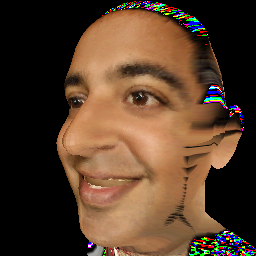

In [13]:
pixel_uvs_30, background_mask_30 = renderer.render(texture=masked_texture, background=background, elev=0.0, azimuth=30.0, result_keys=["pixel_uvs", "background_mask"])

pixel_uvs_30 = torch.tensor(pixel_uvs_30, device=cfg["device"])
background_mask_30 = torch.tensor(background_mask_30, device=cfg["device"]).bool()


final_face_30 = render(texture=torch.tensor(final_texture, device=cfg["device"], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0), background=background, pixel_uvs=pixel_uvs_30, background_mask=background_mask_30)
final_face_np_30 = (final_face_30[0].permute(1, 2, 0).cpu().numpy()).astype(np.uint8)
Image.fromarray(final_face_np_30)

